In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
titanic=pd.read_csv('train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic.isnull().size

10692

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic= titanic.drop(columns = "Cabin", axis = 1)

In [ ]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
titanic['Embarked'].mode()

,Embarked
0,S


In [ ]:
titanic['Embarked'].mode()[0]

'S'

In [ ]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

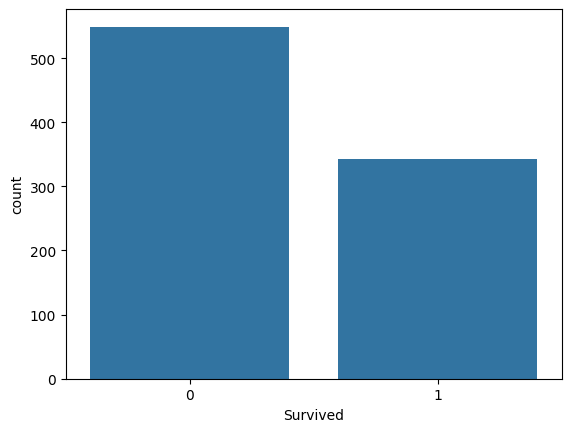

In [ ]:
sns.countplot(x = "Survived", data = titanic)

<Axes: xlabel='Survived', ylabel='Age'>

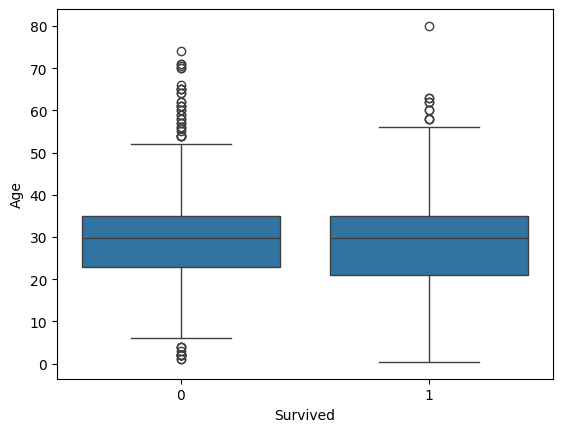

In [ ]:
sns.boxplot(x = "Survived", y = "Age", data = titanic)

In [ ]:
titanic["Sex"].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

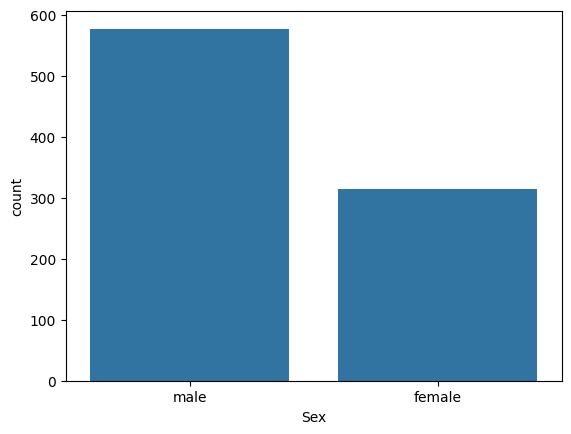

In [ ]:
sns.countplot(x = "Sex", data = titanic)

<Axes: xlabel='Pclass', ylabel='count'>

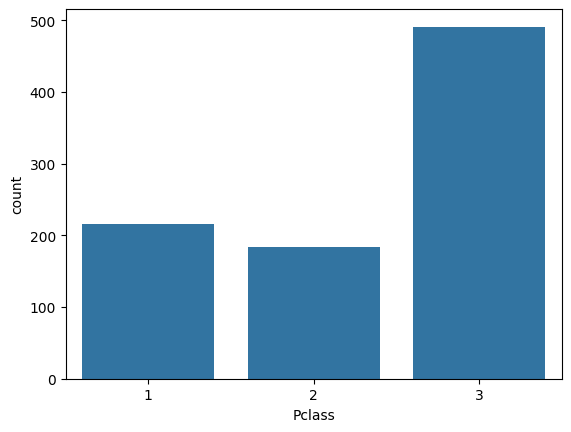

In [ ]:
sns.countplot(x = "Pclass", data = titanic)

<Axes: xlabel='Sex', ylabel='count'>

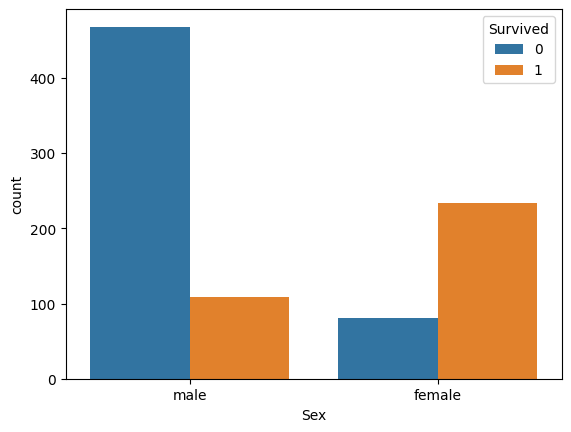

In [ ]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic)

<Axes: xlabel='Pclass', ylabel='count'>

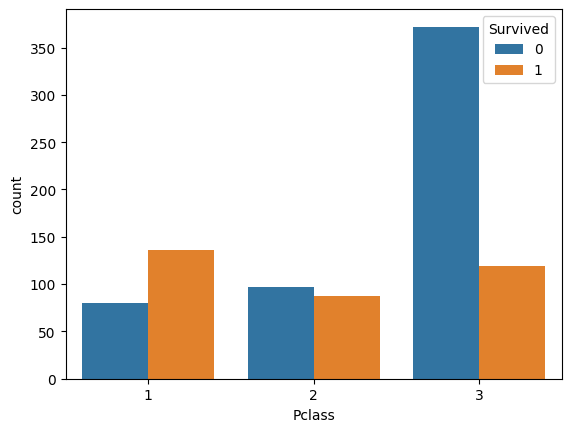

In [ ]:
sns.countplot(x = "Pclass", hue = "Survived", data = titanic)

In [ ]:
titanic["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
print(titanic["Embarked"].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
titanic.replace({"Sex": {"male": 0, "female": 1}, "Embarked": {"S": 0, "C": 1, "Q": 2}}, inplace=True)

In [ ]:
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
X = titanic.drop(columns = ["PassengerId", "Name", "Ticket", "Survived"], axis = 1)
Y = titanic["Survived"]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train,X_test,Y_train,Y_test

(     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 30        1    0  40.000000      0      0   27.7208         1
 10        3    1   4.000000      1      1   16.7000         0
 873       3    0  47.000000      0      0    9.0000         0
 182       3    0   9.000000      4      2   31.3875         0
 876       3    0  20.000000      0      0    9.8458         0
 ..      ...  ...        ...    ...    ...       ...       ...
 534       3    1  30.000000      0      0    8.6625         0
 584       3    0  29.699118      0      0    8.7125         1
 493       1    0  71.000000      0      0   49.5042         1
 527       1    0  29.699118      0      0  221.7792         0
 168       1    0  29.699118      0      0   25.9250         0
 
 [712 rows x 7 columns],
      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 707       1    0  42.000000      0      0  26.2875         0
 37        3    0  21.000000      0      0   8.0500         0
 615       2    1  24.000000   

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,0,40.000000,0,0,27.7208,1
10,3,1,4.000000,1,1,16.7000,0
873,3,0,47.000000,0,0,9.0000,0
182,3,0,9.000000,4,2,31.3875,0
876,3,0,20.000000,0,0,9.8458,0
...,...,...,...,...,...,...,...
534,3,1,30.000000,0,0,8.6625,0
584,3,0,29.699118,0,0,8.7125,1
493,1,0,71.000000,0,0,49.5042,1
527,1,0,29.699118,0,0,221.7792,0


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,0,42.000000,0,0,26.2875,0
37,3,0,21.000000,0,0,8.0500,0
615,2,1,24.000000,1,2,65.0000,0
169,3,0,28.000000,0,0,56.4958,0
68,3,1,17.000000,4,2,7.9250,0
...,...,...,...,...,...,...,...
89,3,0,24.000000,0,0,8.0500,0
80,3,0,22.000000,0,0,9.0000,0
846,3,0,29.699118,8,2,69.5500,0
870,3,0,26.000000,0,0,7.8958,0


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
training_data_Accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy Score of training data: ", training_data_Accuracy)

Accuracy Score of training data:  0.8075842696629213


In [ ]:
print("Classification Report:")
print(classification_report(Y_train, X_train_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       449
           1       0.76      0.70      0.73       263

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importances)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})


In [ ]:
importance['Absolute Coefficient'] = np.abs(importance['Coefficient'])
importance = importance.sort_values(by='Absolute Coefficient', ascending=False)


In [ ]:
print("Feature Importance (Logistic Regression Coefficients):")
print(importance)

Feature Importance (Logistic Regression Coefficients):
    Feature  Coefficient  Absolute Coefficient
1       Sex     2.667341              2.667341
0    Pclass    -1.128778              1.128778
3     SibSp    -0.377353              0.377353
6  Embarked     0.221956              0.221956
2       Age    -0.045317              0.045317
4     Parch     0.009433              0.009433
5      Fare     0.002214              0.002214


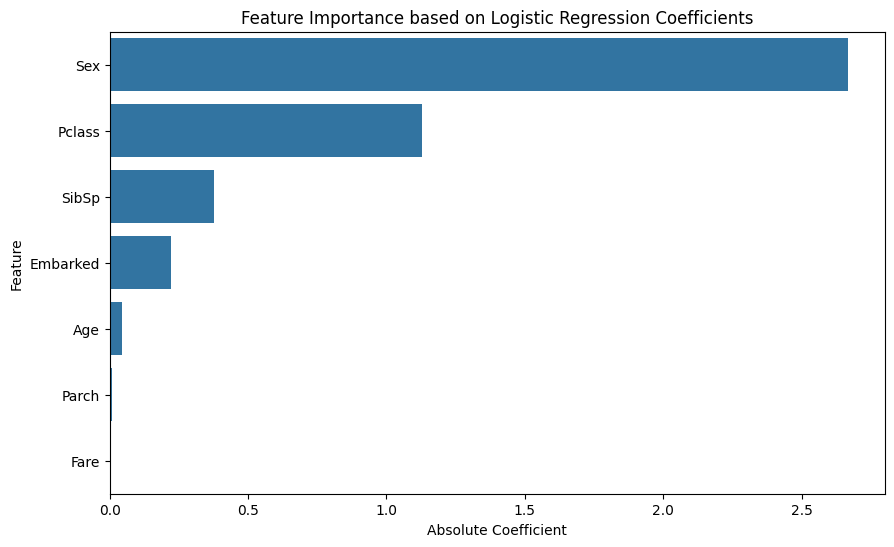

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=importance)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

NameError: name 'StandardScaler' is not defined

In [ ]:
def predict_survival(Pclass, Sex, Age, Fare, Embarked_Q, Embarked_S, FamilySize):
    Sex = 1 if Sex.lower() == 'male' else 0
    IsAlone = 1 if FamilySize == 1 else 0
    input_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'Fare': [Fare],
        'Embarked_Q': [Embarked_Q],
        'Embarked_S': [Embarked_S],
        'FamilySize': [FamilySize],
        'IsAlone': [IsAlone]
    })
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    survival_prob = model.predict_proba(input_data_scaled)[0][1]
    return ("Survived" if prediction[0] == 1 else "Not Survived", survival_prob)



In [ ]:
input_data_scaled = scaler.transform(input_data)

    # Make prediction
prediction = model.predict(input_data_scaled)
survival_prob = model.predict_proba(input_data_scaled)[0][1]

    # Return the prediction and probability of survival
return ("Survived" if prediction[0] == 1 else "Not Survived", survival_prob)

NameError: name 'scaler' is not defined

In [ ]:
Pclass = 3
Sex = 'male'
Age = 28
Fare = 7.25
Embarked_Q = 0  # Embarked from Queenstown
Embarked_S = 1  # Embarked from Southampton
FamilySize = 1


In [ ]:
result, probability = predict_survival(Pclass, Sex, Age, Fare, Embarked_Q, Embarked_S, FamilySize)
print(f'Prediction: {result}')
print(f'Probability of Survival: {probability:.2f}')

NameError: name 'scaler' is not defined

In [ ]:
print(f'Prediction: {result}')
print(f'Probability of Survival: {probability:.2f}')

NameError: name 'result' is not defined

In [ ]:
training_data_Accuracy

0.8075842696629213

In [ ]:
accuracy_df = pd.DataFrame({'Accuracy': [training_data_Accuracy]})

accuracy_df.to_csv('training_accuracy.csv', index=False)